In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import PublicFunctions as pf

# Read

In [2]:
df = pd.read_csv('Data.csv')
df

,Team,Day,Shift,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8
0,0,1,1,661.226099,663.836336,671.874621,662.281672,680.496261,644.955058,666.712699,648.901091
1,0,1,2,662.803141,659.943059,659.911707,638.021454,664.466429,671.007553,683.703054,673.506159
2,0,1,3,635.516188,648.661143,674.810351,650.674246,665.890920,645.414013,672.890260,677.600880
3,0,2,1,666.711323,666.683868,665.650363,655.540080,670.241834,662.910582,664.824587,669.309270
4,0,2,2,683.374869,685.590302,660.432865,670.059662,667.989203,680.830110,643.638658,653.279758
...,...,...,...,...,...,...,...,...,...,...,...
3271,155,6,2,641.724660,662.131416,653.611551,673.484870,662.382046,677.442291,665.818690,653.053824
3272,155,6,3,667.115932,658.249365,647.960892,650.065114,673.334040,675.946211,653.129823,676.059513
3273,155,7,1,649.439305,661.070588,669.850182,661.728555,660.374071,666.545913,661.172410,669.244902
3274,155,7,2,652.522083,655.253266,668.384847,663.130878,670.883500,638.938728,676.645502,670.288580


# Calculate the center lines and control limits for both x-bar and R charts

Add two columns to the data frame

In [3]:
values = df[['Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6', 'Item 7', 'Item 8']]

In [4]:
df = df.assign(Sample_ID = df['Day'] + 0.1*df['Shift'])
df['Sample_ID'] = df.Sample_ID.astype('str')
df = df.assign(xBar=np.random.randint(600,700,size=(len(df),1)))#Must change this
df = df.assign(R=np.random.randint(2,100,size=(len(df),1)))#Must change this
df

,Team,Day,Shift,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Sample_ID,xBar,R
0,0,1,1,661.226099,663.836336,671.874621,662.281672,680.496261,644.955058,666.712699,648.901091,1.1,635,70
1,0,1,2,662.803141,659.943059,659.911707,638.021454,664.466429,671.007553,683.703054,673.506159,1.2,685,13
2,0,1,3,635.516188,648.661143,674.810351,650.674246,665.890920,645.414013,672.890260,677.600880,1.3,650,37
3,0,2,1,666.711323,666.683868,665.650363,655.540080,670.241834,662.910582,664.824587,669.309270,2.1,622,77
4,0,2,2,683.374869,685.590302,660.432865,670.059662,667.989203,680.830110,643.638658,653.279758,2.2,657,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,155,6,2,641.724660,662.131416,653.611551,673.484870,662.382046,677.442291,665.818690,653.053824,6.2,666,32
3272,155,6,3,667.115932,658.249365,647.960892,650.065114,673.334040,675.946211,653.129823,676.059513,6.3,617,34
3273,155,7,1,649.439305,661.070588,669.850182,661.728555,660.374071,666.545913,661.172410,669.244902,7.1,613,55
3274,155,7,2,652.522083,655.253266,668.384847,663.130878,670.883500,638.938728,676.645502,670.288580,7.2,664,11


In [5]:
xBar_CL = 660#Must change this
stddev = 10
stderror = 10#Must change this
xBar_UCL = xBar_CL + 3*stderror
xBar_LCL = xBar_CL - 3*stderror
print(xBar_CL, xBar_UCL, xBar_LCL)

660 690 630


In [6]:
R_CL = 20#Must change this
D3 = 0.05#Must change this
D4 = 1.95#Must change this
R_UCL = R_CL*D4
R_LCL = R_CL*D3
print(R_CL, R_UCL, R_LCL)

20 39.0 1.0


# Draw the team's charts w/o marking

In [7]:
team = 0
xLabels = df[df['Team']==team]['Sample_ID']
xBarValues = df[df['Team']==team]['xBar']
RValues = df[df['Team']==team]['R']

<function matplotlib.pyplot.show(close=None, block=None)>

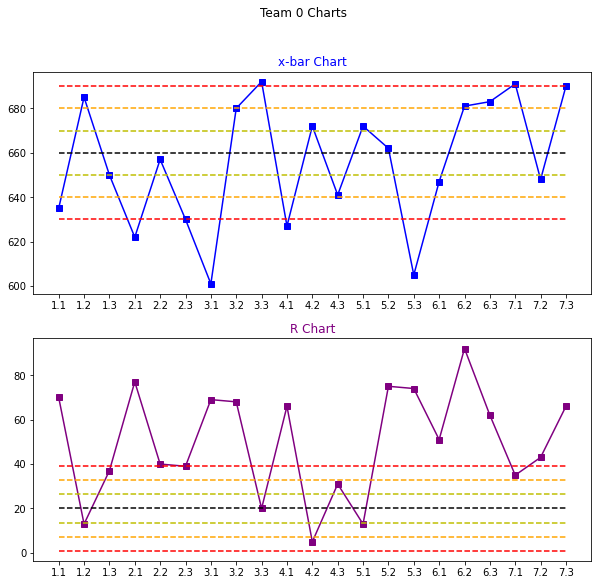

In [8]:
fig = pf.DrawCombinedxBarAndRCharts(xLabels, xBarValues, RValues, xBar_CL, xBar_UCL, xBar_LCL, R_CL, R_UCL, R_LCL)
fig.suptitle('Team ' + str(team) + ' Charts')
plt.show

# Mark any out-of-control observations and trends

# Process Capability

In [9]:
Cpk = 1#Must change this
Cpk

1